# TP 4 Mesures dans l’image du fond de l’œil 


### Installation

In [1]:
pip install opencv-python

Note: you may need to restart the kernel to use updated packages.


In [2]:
from skimage import io, color, filters
import matplotlib.pyplot as plt 
import cv2 
import numpy as np
from skimage.io import imread,imshow
from skimage import morphology, segmentation, feature
from skimage.filters import  threshold_otsu, frangi
from skimage import measure
import math

 ### Image segmentée du système vasculaire (images de mise au point et de test) ;

Text(0.5, 1.0, 'Image initial gauche')

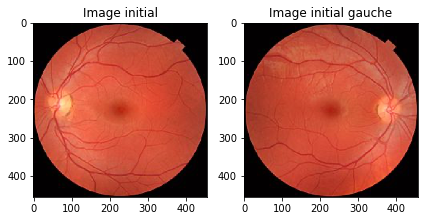

In [3]:
image= cv2.imread('fond_oeil.png') 
image_d=cv2.imread('fond_oeil_test1.png')
plt.subplot(1,2,1)
io.imshow('fond_oeil.png')
plt.title('Image initial')
plt.subplot(1,2,2)
io.imshow('fond_oeil_test1.png')
plt.title('Image initial gauche')

Text(0.5, 1.0, 'Histogramme des pixels de l oeil')

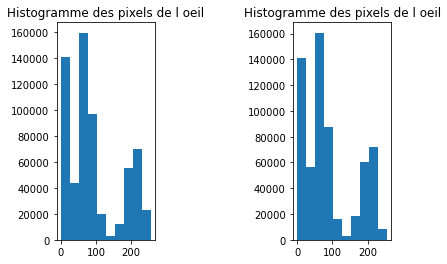

In [4]:
#Histogramme des images
plt.subplot(1,3,1)
fig=image.ravel()
plt.hist(fig)
plt.title('Histogramme des pixels de l oeil')
plt.subplot(1,3,3)
fig=image_d.ravel()
plt.hist(fig)
plt.title('Histogramme des pixels de l oeil')

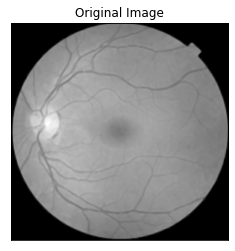

In [5]:
#Image initiale
img = cv2.imread('fond_oeil.png',0)
img = cv2.medianBlur(img,5)
title = 'Original Image'
plt.imshow(img,'gray')
plt.title(title)
plt.xticks([]),plt.yticks([])
plt.show()



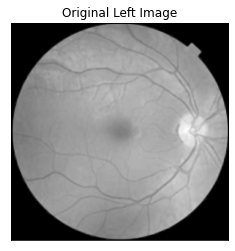

In [6]:
#Deuxième image de l'oeil
img2 = cv2.imread('fond_oeil_test1.png',0)
img2 = cv2.medianBlur(img2,5)
title = 'Original Left Image'
plt.imshow(img2,'gray')
plt.title(title)
plt.xticks([]),plt.yticks([])
plt.show()

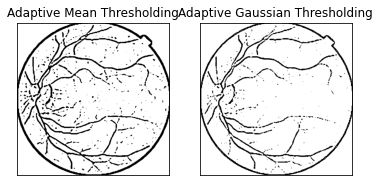

In [7]:
#Utilisation du mean et de la gaussienne
th2 = cv2.adaptiveThreshold(img,255,cv2.ADAPTIVE_THRESH_MEAN_C,\
            cv2.THRESH_BINARY,11,2.2)
th3 = cv2.adaptiveThreshold(img,255,cv2.ADAPTIVE_THRESH_GAUSSIAN_C,\
            cv2.THRESH_BINARY,11,2.3)

titles = ['Adaptive Mean Thresholding', 'Adaptive Gaussian Thresholding']
images = [th2, th3]

for i in range(2):
    plt.subplot(1,2,i+1),plt.imshow(images[i],'gray')
    plt.title(titles[i])
    plt.xticks([]),plt.yticks([])
plt.show()

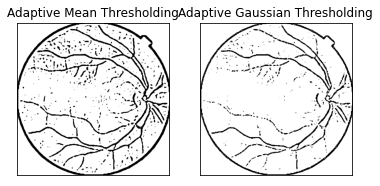

In [8]:
#Utilisation du mean et de la gaussienne pour l'image test (gauche)

th2_2 = cv2.adaptiveThreshold(img2,255,cv2.ADAPTIVE_THRESH_MEAN_C,\
            cv2.THRESH_BINARY,11,2.2)
th3_3 = cv2.adaptiveThreshold(img2,255,cv2.ADAPTIVE_THRESH_GAUSSIAN_C,\
            cv2.THRESH_BINARY,11,2.3)

titles = ['Adaptive Mean Thresholding', 'Adaptive Gaussian Thresholding']
images_2 = [th2_2, th3_3]

for i in range(2):
    plt.subplot(1,2,i+1),plt.imshow(images_2[i],'gray')
    plt.title(titles[i])
    plt.xticks([]),plt.yticks([])
plt.show()

Text(0.5, 1.0, 'Image du masque sans contour')

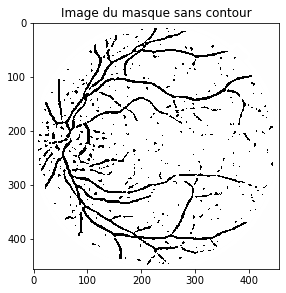

In [9]:
#Enlever le contour de l'oeil afin d'isoler les vaisseaux sanguins dans l'oeil
x=228
y=228
mask= np.zeros(img.shape[:2],dtype=np.uint8)
r2=224
mask_r2=cv2.circle(mask, (x,y), r2, (255,255,255), -1)
m2= mask_r2-th2
eye=cv2.bitwise_not(m2,th2)
io.imshow(eye)
plt.title('Image du masque sans contour')


Text(0.5, 1.0, 'Image du masque sans contour')

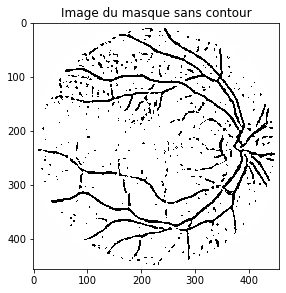

In [10]:
#Enlever le contour de l'oeil afin d'isoler les vaisseaux sanguins dans l'oeil gauche
x=228
y=228
mask_2= np.zeros(img2.shape[:2],dtype=np.uint8)
r2=224
mask_r2_2=cv2.circle(mask_2, (x,y), r2, (255,255,255), -1)
m2_2= mask_r2_2-th2_2
eye_2=cv2.bitwise_not(m2_2,th2_2)
io.imshow(eye_2)
plt.title('Image du masque sans contour')

### Détermination de l'aire des faisceaux pour les deux images

In [11]:
#Pour la première image
sizel=np.size(eye,1)
sizec=np.size(eye,0)
n=0
for i in range(sizec):
    for j in range(sizel):
        if eye[i,j]==0:
            n+=1
aire_oeil=3.14*(450/2)**2
ratio= n/(n+aire_oeil)*100
print('Aire des vaisseaux sanguins vaut:',n,'pixels')
print('Aire de l oeil vaut:', aire_oeil,'pixels')
print('Pourcentage de vaisseaux dans loeil:',ratio,'% de pixels')

Aire des vaisseaux sanguins vaut: 17931 pixels
Aire de l oeil vaut: 158962.5 pixels
Pourcentage de vaisseaux dans loeil: 10.136607619839054 % de pixels


In [12]:
#Pour la deuxième image
sizel2=np.size(eye_2,1)
sizec2=np.size(eye_2,0)
m=0
for i in range(sizec2):
    for j in range(sizel2):
        if eye_2[i,j]==0:
            m+=1
            
aire_oeil2=3.14*(450/2)**2
ratio2= m/(m+aire_oeil2)*100
print('Aire des vaisseaux sanguins  vaut:',m,'pixels')
print('Aire de l oeil vaut:', aire_oeil2,'pixels')
print('Pourcentage de vaisseaux dans loeil:',ratio2,'% de pixels')

Aire des vaisseaux sanguins  vaut: 18761 pixels
Aire de l oeil vaut: 158962.5 pixels
Pourcentage de vaisseaux dans loeil: 10.55628546590631 % de pixels


### Après avoir comparer deux images, on observe que l'aire des vaisseaux sanguins vaut en moyenne 18 000 pixels et l'aire de l'oeil correspond à 16 000 pixels